## Librerias

In [1]:
import pygmt
import pandas as pd
import numpy as np

## Elevacion

In [2]:
subset_region = [-103, -91.5, 13, 19] #limites del mapa, coordenadas
grid_subset = pygmt.datasets.load_earth_relief(resolution="01m", region=subset_region)

## Min y Max de la elevacion

In [3]:
grid_subset.min()

<xarray.DataArray 'elevation' ()>
array(-6695.5, dtype=float32)

In [4]:
grid_subset.max()

<xarray.DataArray 'elevation' ()>
array(4129., dtype=float32)

## Datos de los sismos

In [5]:
df=pd.DataFrame(
    {'#sismo': [15, 14, 13,	12,	11,	10,	9, 8, 7, 6, 5, 4, 3, 2, 1],
     'latitude': [18.533, 30.384, 17.112, 17.306, 18.265, 17.108, 17.195, 18.151, 16.899, 16.59, 17.15, 15.887, 15.603, 16.807, 16.402],
     'longitude': [-98.715, -109.333, -101.552, -94.659, -98.788, -94.836, -95.353, -100.211, -101.284, -101.355, -101.367, -96.985, -98.985, -99.714, -99.856],
     'depth' : [4.4, 20, 20, 142.3, 57, 130.5, 0, 0, 10.4, 0.1, 0, 28.8, 4.4, 20, 20],
     'magnitude' : [3.9, 4.2, 4, 4.1, 3.9, 4, 3.9, 4, 6.1, 6.5, 7.2, 3.8, 4, 4.8, 4.5]
     }
)

In [6]:
df.depth.max()

142.3

## Mapa

el factor para la magnitud utilizado es e^(magnitud/1.42) x 0.0057 usado para una mejor visualizacion. Se modifico y se termino usando el factor magnitud x 0.05

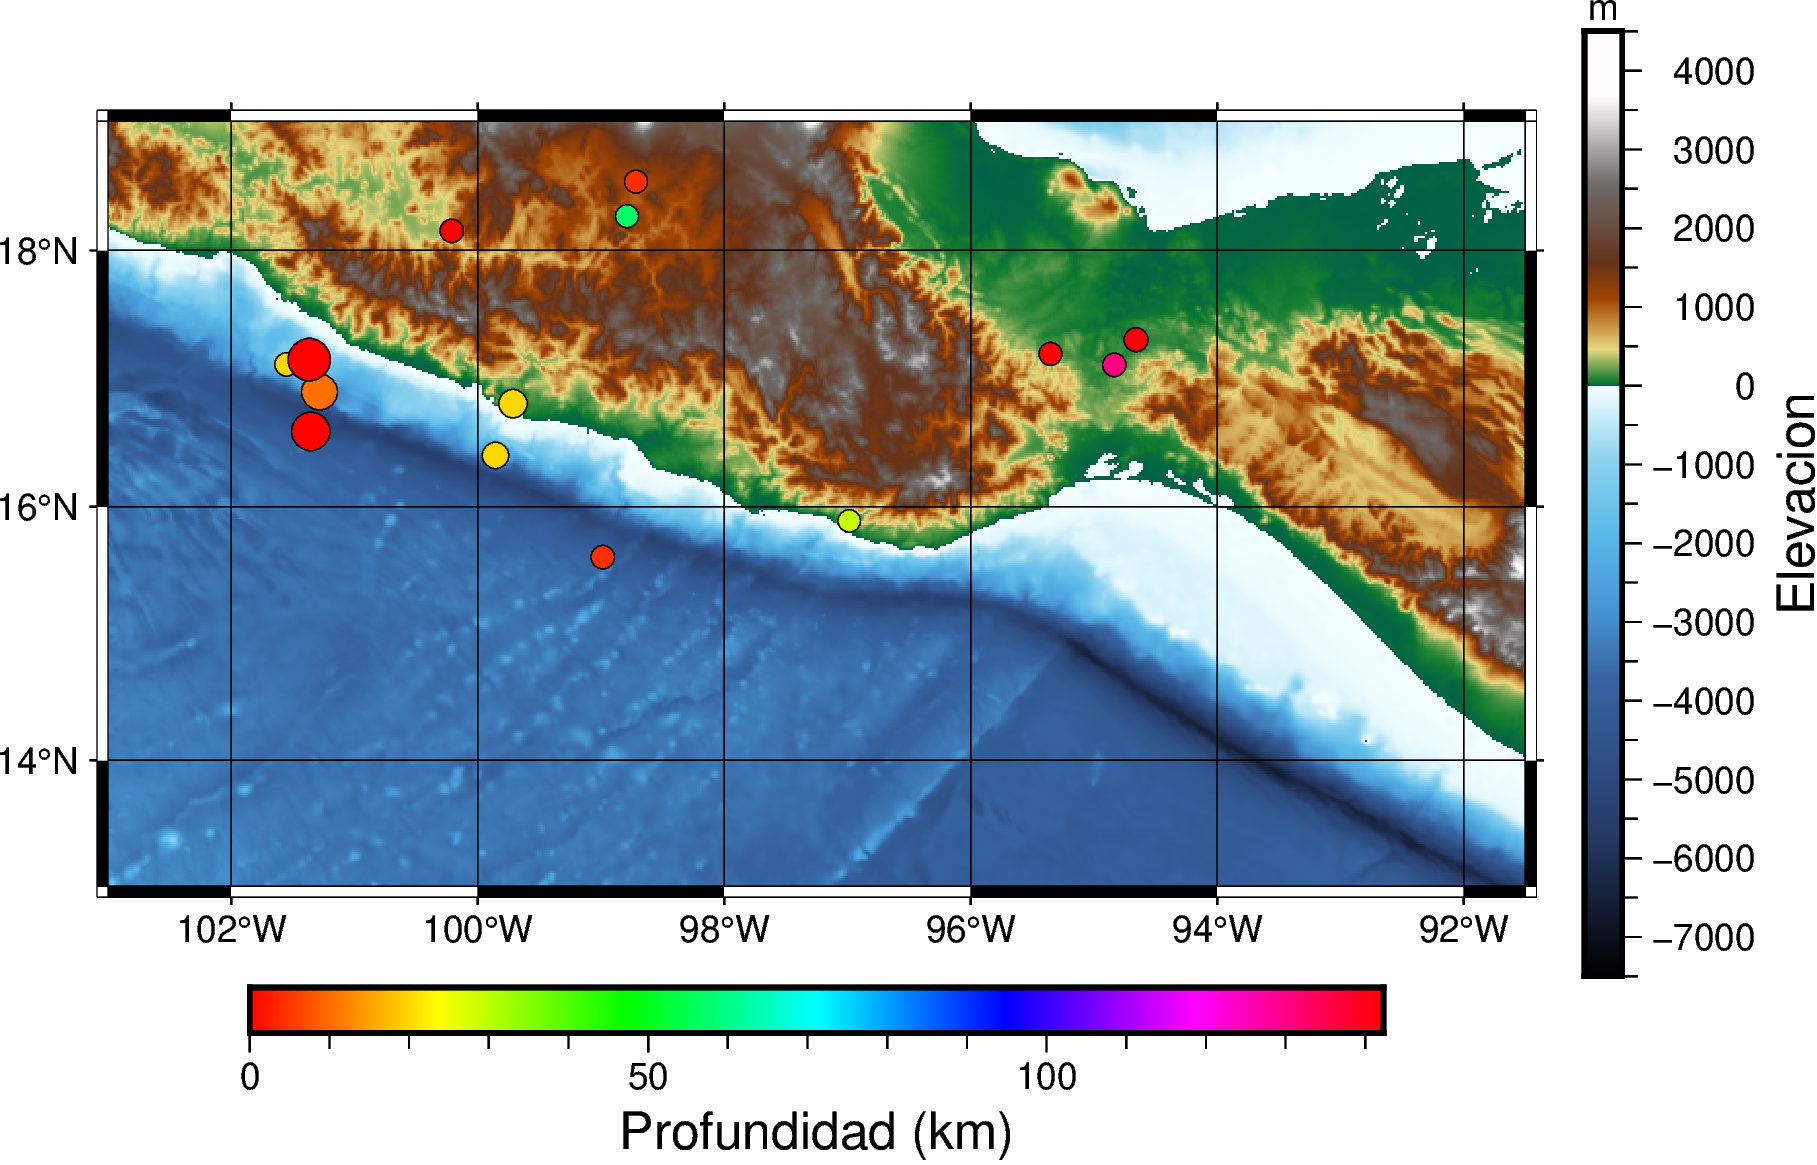

In [7]:
fig = pygmt.Figure()

pygmt.makecpt(cmap="geo", series=[-7500, 4500]) #para la topografia

fig.grdimage(grid=grid_subset, projection="M-115.45/32.3/12c", region=subset_region, frame="ag") #se crea el grid
fig.colorbar(position="JMR+o0.5c/0c+w8c", frame=["a1000f500", "x+lElevacion", "y+lm"]) #se muestra la escala

pygmt.makecpt(cmap="cyclic", series=[df.depth.min(), df.depth.max()]) #para la profundidad de los sismos

# se grafican los hipocentros
fig.plot(
    x=df.longitude,
    y=df.latitude,
    size=(df.magnitude)*0.05,
    color=df.depth,
    cmap=True,
    style="cc",
    pen="black"
)

fig.colorbar(frame='x+l"Profundidad (km)"') #escala de colores para la profundidad
fig.show()

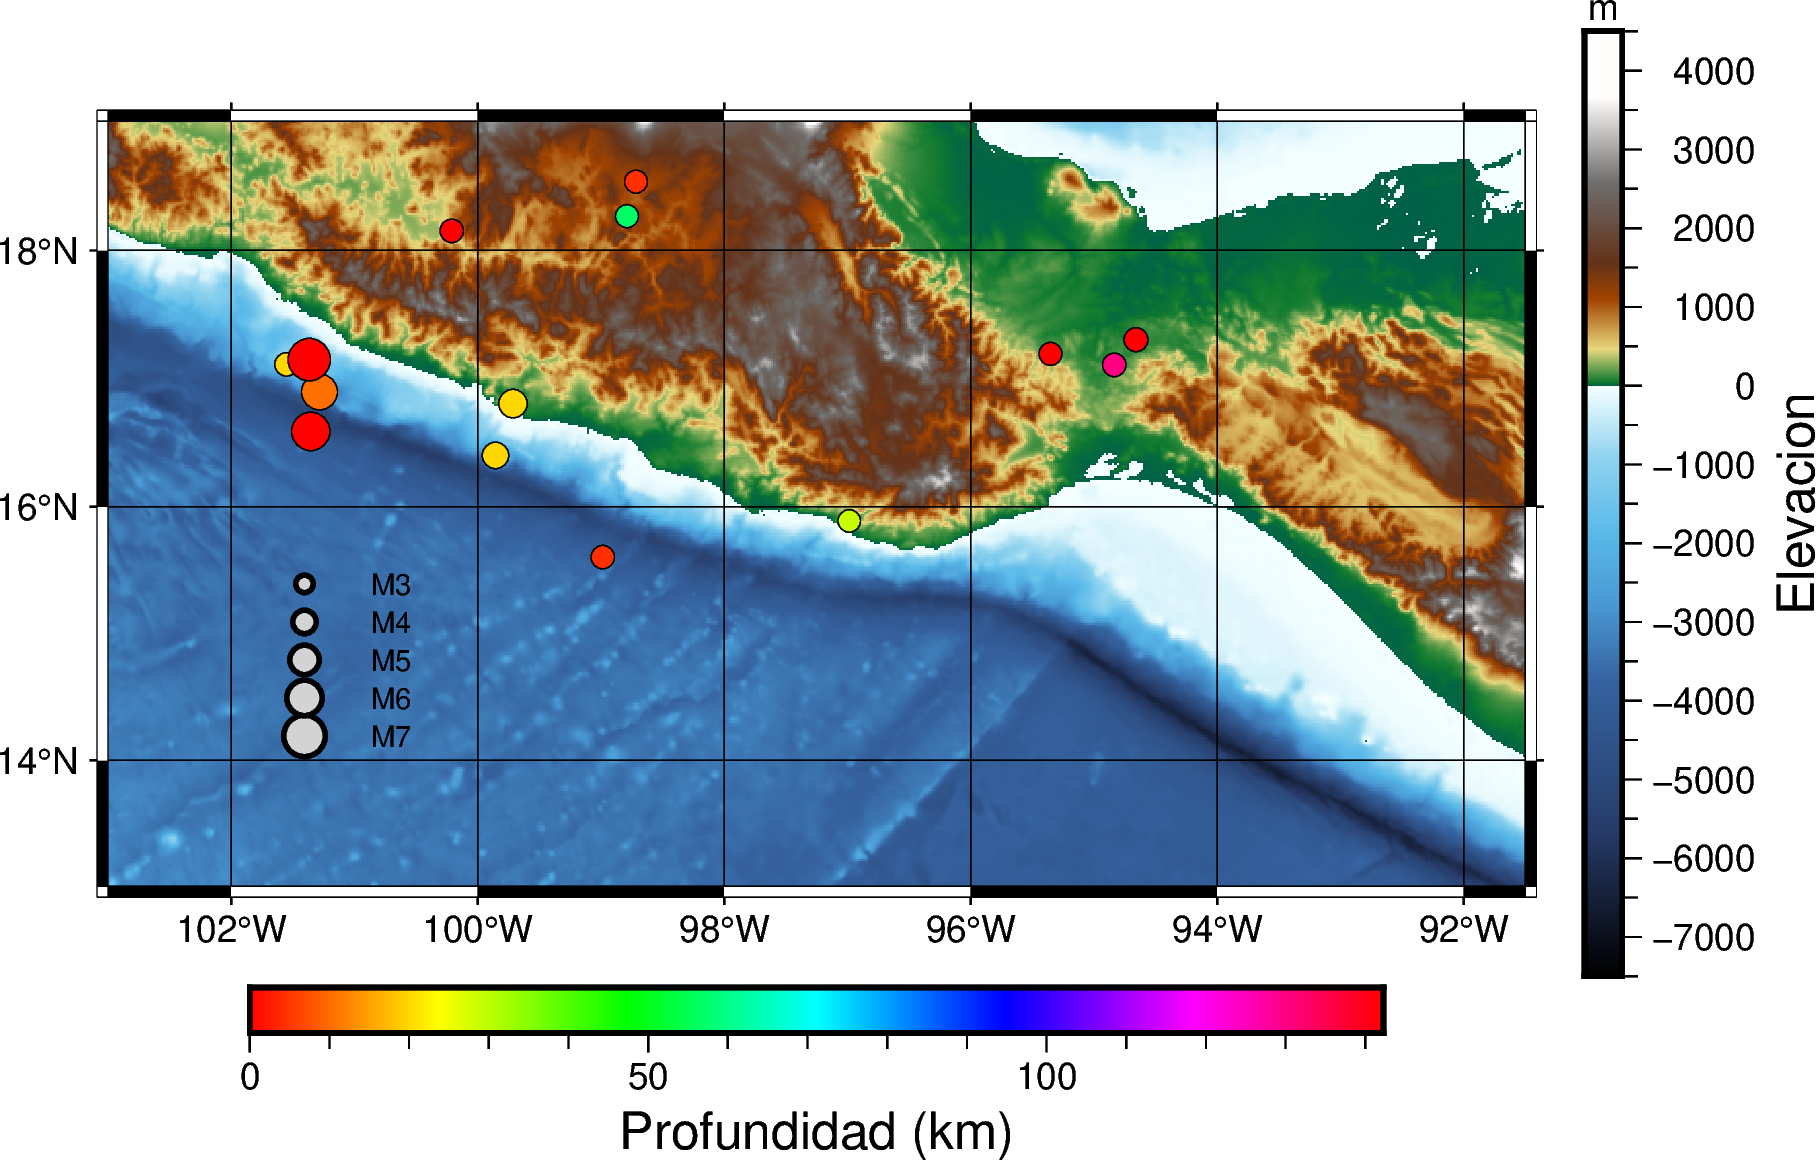

In [8]:
col_leg = 'lightgray'

fig.shift_origin(xshift = '0.1c', yshift = '0.1c') #para usar el ultimo mapa, para modificarlo correr el segmento anterior

# circulos
xval1 = -101.5
fig.plot(region = subset_region , projection = 'M-115.45/32.3/12c', x = xval1, y = 15.3, style = 'c' + str(3*0.05), pen = '1.2p,black', color = col_leg)
fig.plot(x = xval1, y = 14.1, style = 'c' + str(7*0.05) , pen = '1.2p,black', color = col_leg)
fig.plot(x = xval1, y = 14.4, style = 'c' + str(6*0.05) , pen = '1.2p,black', color = col_leg)
fig.plot(x = xval1, y = 14.7, style = 'c' + str(5*0.05) , pen = '1.2p,black', color = col_leg)
fig.plot(x = xval1, y = 15.0, style = 'c' + str(4*0.05) , pen = '1.2p,black', color = col_leg)

# anotaciones
xval2 = -100.8
fig.text(x = xval2 , y =  15.3, text = 'M3', font = '7p')
fig.text(x = xval2 , y =  15.0, text = 'M4', font = '7p')
fig.text(x = xval2 , y =  14.7, text = 'M5', font = '7p')
fig.text(x = xval2 , y =  14.4, text = 'M6', font = '7p')
fig.text(x = xval2 , y =  14.1, text = 'M7', font = '7p')

fig.show()